# Product instance

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import rayleigh, gilbrat, norm, truncnorm
import seaborn as sns
import random
import time
from datetime import datetime
import sys
from datetime import date
from numba import njit

ModuleNotFoundError: No module named 'numba'

In [ ]:
products = pd.read_csv('C:/Users/ivan-/Downloads/products (1).csv').set_index('id')
products.head()

In [18]:
customers = pd.read_csv('C:/Users/ivan-/Downloads/Customers_last.csv').set_index('Customer_ID')
print(customers.count())
customers.head()

Unnamed: 0            10000
Gender                10000
First name            10000
Last name             10000
Date_of_birth         10000
Agree_for_promo       10000
autoplay_card         10000
Customer_Email        10000
MSISDN                10000
Status                10000
Category              10000
Customer_Since        10000
Region                10000
Language              10000
termination_date          0
Customer_City         10000
Customer_City_Type    10000
dtype: int64


,Unnamed: 0,Gender,First name,Last name,Date_of_birth,Agree_for_promo,autoplay_card,Customer_Email,MSISDN,Status,Category,Customer_Since,Region,Language,termination_date,Customer_City,Customer_City_Type
Customer_ID,,,,,,,,,,,,,,,,,
2100,0,Male,Moinuddin,Khalidifamily,1987-04-09,No,No,MoinuddinKhalidifamily86@arasco.net.sa,+996-55-7242344,Active,Physical,2007-11-17,Riyadh,Arabic,NaN,Al-Bādah,town
4427,1,Male,Mehdi,Chakroun,2003-05-25,Yes,No,MehdiChakroun15@sahara.com.sa,+996-50-5733515,Inactive,Physical,2021-12-31,Eastern,Arabic,NaN,Makkah al-Mukarramah,city
5838,2,Male,Quddus,Al-Asiri,1986-11-25,No,No,QuddusAl-Asiri28@compuserve.com,+996-55-2539203,Active,Physical,2006-04-18,Najran,Arabic,NaN,Najrān,city
564,3,Female,Asma,Hayek,1974-09-29,No,No,AsmaHayek28@sahara.com.sa,+996-54-4885651,Inactive,Physical,2013-09-30,Mecca,Arabic,NaN,Tabūk,city
4479,4,Female,Lulwa,Al-Hashimi,1975-05-20,Yes,No,LulwaAl-Hashimi84@saudia-omline.com,+996-58-5100291,Active,Physical,2000-07-08,Tabuk,Arabic,NaN,Khamīs Mushaīṭ,city


In [19]:
# https://worldpopulationreview.com/countries/saudi-arabia-population
population = 35678883
female_percent = 42.6
male_percent = 57.4
# government stats https://www.stats.gov.sa/en/5305
below_20_total = (2674932 + 2771032 + 2428319 + 2216050) / 31787580
below_20_saudis_only = (2137185 + 2088919 + 1869325 + 1761027) / 20081582

# https://www.gsma.com/publicpolicy/wp-content/uploads/2012/03/GSMA_ChildrensMobilePhones2013WEB.pdf
children_with_smartphones = 70.5
children_with_phones = 87.0
children_used_phone_once = 6.7

# https://www.itu.int/en/ITU-D/Regional-Presence/ArabStates/Documents/events/2018/Women/GSMA%20Connected%20Women%20Gender%20Gap%20Report%202018%20-%20Oliver%20Rowntree.pdf
gender_gap_facebook = 70.0
# https://www.mckinsey.com/~/media/mckinsey/industries/technology%20media%20and%20telecommunications/telecommunications/our%20insights/winning%20the%20rush%20for%20data%20services%20in%20the%20middle%20east%20and%20africa/telecommunications%20industry%20at%20cliffs%20edge%20time%20for%20bold%20decisions_june2016.pdf
# Saudi Arabia has world’s highest rate of YouTube subscribers

In [20]:
# https://datareportal.com/reports/digital-2021-saudi-arabia
connections_per_user = 1.127
total_connections = connections_per_user * population

# Gender gap calculation: https://www.gsma.com/mobilefordevelopment/wp-content/uploads/2018/04/GSMA_The_Mobile_Gender_Gap_Report_2018_32pp_WEBv7.pdf
mt = (population * male_percent / 100)
ft = (population * female_percent / 100)


mu = population / (1 + 0.76 * ft / mt)
fu = 0.76 * ft * mu / mt

female_connections = fu
male_connections = total_connections - female_connections
male_connections_percent = male_connections / total_connections
female_connections_percent = female_connections / total_connections

# https://theinclusiveinternet.eiu.com/explore/countries/SA/performance/indicators/affordability/competitive-environment/average-revenue-per-user-arpu-annualized
annual_ARPU_in_dollars = 332
saudi_riyal_to_dollars = 0.27
# monthly expenditure
mean_national_expenditure = annual_ARPU_in_dollars / 12 / saudi_riyal_to_dollars

customers_number = customers.count()[0]
# customers_number = 10000
sample_connections = customers_number * connections_per_user
male_size = int(sample_connections * male_connections_percent)
female_size = int(sample_connections * female_connections_percent)

# This value help the histogram look like th
std = mean_national_expenditure * 0.572


# the distribution of household expenditure for mobile phones: https://slideplayer.com/slide/17640605/
# 50, 70, 1.3, 2 – coefficients that worked well so that the histogram looks similar to the known histogram and the mean is about the same as the known mean value
# For more diverse range values, most primary belonging to men as they have many more jobs and much more income
male_coef = int(customers_number * 0.1)

male_expenditures = rayleigh.rvs(loc=mean_national_expenditure-50, scale=std/1.3, size=male_size - male_coef)
female_expenditures = rayleigh.rvs(loc=mean_national_expenditure-70, scale=std/2, size=female_size)
third_part_1 = np.random.uniform(size=int(0.45 * male_coef), low=34.5, high=650)
third_part_2 = np.random.uniform(size=int(0.05 * male_coef), low=650, high=1200)
fourth_part = norm.rvs(size=int(0.5 * male_coef), loc=mean_national_expenditure-60, scale=15)
male_expenditures = np.concatenate([male_expenditures, third_part_1, third_part_2, fourth_part])

male_expenditures[male_expenditures < 34.5] = 34.5
female_expenditures[female_expenditures < 34.5] = 34.5
total_expenditure = np.concatenate([male_expenditures, female_expenditures])
np.random.shuffle(total_expenditure)

In [21]:
# A quick check with the known mean
print(mean_national_expenditure)
print(np.mean(total_expenditure))
print(len(total_expenditure))
print(male_size, female_size, male_size + female_size)
print(male_connections_percent + female_connections_percent)

102.46913580246914
105.98229477048477
11269
7663 3606 11269
1.0


Freedman–Diaconis number of bins: 262


(array([284., 227., 276., 346., 401., 457., 506., 580., 524., 605., 549.,
        551., 543., 511., 489., 477., 449., 371., 384., 331., 326., 229.,
        223., 218., 165., 162., 135., 118.,  91.,  71.,  61.,  55.,  30.,
         33.,  31.,  20.,  16.,   8.,  14.,   9.,  10.,   9.,   4.,   6.,
          3.,  11.,   6.,   6.,   5.,   7.,   2.,   3.,   2.,   2.,   2.,
          0.,   6.,   6.,   4.,   5.,   4.,   6.,   3.,   4.,   2.,   4.,
          5.,   4.,   6.,   4.,   4.,   0.,   1.,   5.,   3.,   2.,   4.,
          2.,   1.,   2.,   4.,   2.,   3.,   6.,   5.,   3.,   3.,   3.,
          5.,   5.,   4.,   1.,   4.,   5.,   2.,   2.,   2.,   3.,   3.,
          3.,   1.,   1.,   1.,   2.,   4.,   3.,   5.,   4.,   2.,   1.,
          3.,   5.,   2.,   6.,   6.,   5.,   2.,   1.,   1.,   6.,   2.,
          3.,   2.,   3.,   1.,   3.,   3.,   1.,   3.,   3.,   1.,   2.,
          4.,   6.,   2.,   0.,   4.,   4.,   2.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0., 

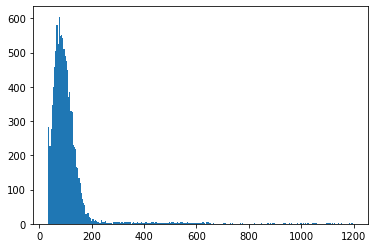

In [22]:
# calculate the number of bins
def find_bins_number(ndarr):
    q25, q75 = np.percentile(ndarr, [25, 75])
    bin_width = 2 * (q75 - q25) * len(ndarr) ** (-1/3)
    bins = round((ndarr.max() - ndarr.min()) / bin_width)
    print("Freedman–Diaconis number of bins:", bins)
    return bins

# plot
bins = find_bins_number(total_expenditure)
plt.hist(total_expenditure, bins=bins)

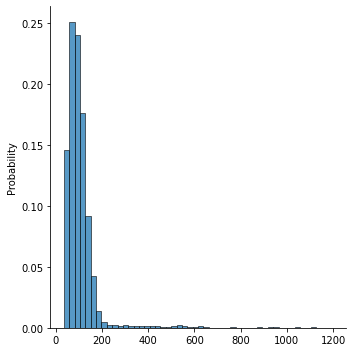

In [23]:
# probability plot
sns.displot(total_expenditure[total_expenditure <= 1200], stat='probability', bins=50)

In [24]:
# The start of DataFrame creation
ids = np.arange(len(total_expenditure))
gender = np.hstack((np.array(['male'] * male_size), np.array(['female'] * female_size)))
expenditures = np.hstack((male_expenditures, female_expenditures))
tariff = np.array([-1] * len(total_expenditure))

print(len(gender), len(expenditures))
table = pd.DataFrame({'id': ids, 'gender': gender, 'expenditure': expenditures, 'tariff_id': tariff})
table.head()

11269 11269


,id,gender,expenditure,tariff_id
0,0,male,97.377203,-1
1,1,male,96.697448,-1
2,2,male,87.381712,-1
3,3,male,130.553570,-1
4,4,male,130.305421,-1


In [25]:
# Data-only sims assignment
# https://www.refworld.org/pdfid/502a0c51a.pdf
data_only_subscriptions = 7.8 * 10 ** 6
data_only_subscriptions_percent = data_only_subscriptions / total_connections
data_only_in_dataset = int(len(total_expenditure) * data_only_subscriptions_percent)

# Generate frequency of different data-only plans by gilbrat distribution
s = gilbrat.rvs(loc=mean_national_expenditure-50, scale=60, size=data_only_in_dataset)
s_len = len(s)


data_ids = [5, 7, 6, 8, 3, 4]
data_only_prices = [148, 171, 201, 230, 391, 1121]


lengths = []
lengths.append(len(s[s < data_only_prices[0]]))
for i in range(len(data_only_prices) - 1):
    lengths.append(len(s[(s >= data_only_prices[i]) & (s < data_only_prices[i + 1])]))
lengths.append(len(s[s >= data_only_prices[-1]]))
print(lengths)

# Finally, assignment
table=table.sort_values(by=['expenditure']).reset_index(drop=True)
table.iloc[-lengths[-1]:, 3] = data_ids[-1]
table.iloc[-lengths[-1]:, 2] = data_only_prices[-1]

for data_id, data_price, length in (list(zip(data_ids, data_only_prices, lengths))[-2::-1]):
    # print(data_id, data_price, length)
    # df = \
    condition_1 = table['expenditure'] <= data_price
    ind = table[table['expenditure'] <= data_price].index[-1]
    condition_2 = table.index <= ind
    cond_3 = ind - length < table.index
    table.iloc[(condition_1 & condition_2 & cond_3).values, 3] = data_id
    table.iloc[(condition_1 & condition_2 & cond_3).values, 2] = data_price

[1461, 180, 148, 110, 187, 96, 3]


In [26]:
print(table[table.tariff_id != -1].count())
print(data_only_in_dataset)
print(table.count())

id             2089
gender         2089
expenditure    2089
tariff_id      2089
dtype: int64
2185
id             11269
gender         11269
expenditure    11269
tariff_id      11269
dtype: int64


In [27]:
# Prepaid/postpaid tariffs assignment
# Frequences according to the graph
prepaid_subscriptions_f = 0.75
postpaid_subscriptions_f = 0.25

# https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS?locations=SA
# male_labor_force = 0.79124
# female_labor_force = 0.20876

# Since there is no way to know the rate of postpaid among genders/age groups, etc, the postpaid are given out randomly
# indexes are chosen arbitrarily
df = table[(table['expenditure'] >= 80.5) & (table['tariff_id'] == -1)]
postpaid_num_1 = random.sample(list(df.index), int(df.count()[0] * postpaid_subscriptions_f * 0.95))
table.iloc[[postpaid_num_1], 3] = 24

df2 = table[(table['expenditure'] >= 571.5) & (table['tariff_id'] == -1)]
postpaid_num_2 = random.sample(list(df2.index), int(df.count()[0] * postpaid_subscriptions_f * 0.05))
table.iloc[[postpaid_num_2], 3] = 25

# df3 = table[(table['expenditure'] >= 253.0) & (table['tariff_id'] == -1)]

table.iloc[((table['expenditure'] >= 126.5) & (table['tariff_id'] == -1)).values, 3] = 1
table.iloc[((table['expenditure'] >= 253.0) & (table['tariff_id'] == -1)).values, 3] = 2
table.iloc[(table['tariff_id'] == -1).values, 3] = 0
print(table[table.tariff_id == -1].count())

id             0
gender         0
expenditure    0
tariff_id      0
dtype: int64


In [28]:
# PRODUCT INSTANCE CREATION
# This is used for the situation when the customers table is not fully formed
# customers_0 = customers.copy()
# for i in range(199):
#     customers_0 = pd.concat([customers_0, customers.copy()], axis=0)
# customers_2 = customers_0.sort_values(by=['Gender', 'Category']).reset_index(drop=True)

customers_2 = customers.sort_values(by=['Gender', 'Category']).reset_index(drop=True)
table_2 = table.sort_values(by=['gender', 'expenditure'], ascending=[True, False]).reset_index(drop=True)

product_instances_1 = pd.DataFrame({
    'customer_id': customers_2['Unnamed: 0'],
    'product_id': table_2.iloc[:customers_2.count()[0], 3],
    'expenditure': table_2.iloc[:customers_2.count()[0], 2]
})

# using males from the end
start_index = table_2.count()[0] - customers_2.count()[0]
product_instances_2 = pd.DataFrame({
    'customer_id': customers_2.iloc[-start_index:, 0].values,
    'product_id': table_2.iloc[customers_2.count()[0]:, 3],
    'expenditure': table_2.iloc[customers_2.count()[0]:, 2]
})
product_instances = pd.concat([product_instances_1, product_instances_2], axis=0)

# Activation date
def str_time_prop(start, end, time_format, prop):
    stime = time.mktime(time.strptime(start, time_format))
    etime = time.mktime(time.strptime(end, time_format))
    ptime = stime + prop * (etime - stime)
    return time.strftime(time_format, time.localtime(ptime))

def random_date(start, end, prop):
    return str_time_prop(start, end, '%Y-%m-%d', prop)

dates = []
for _ in range(product_instances.count()[0]):
    dates.append(random_date("2018-01-01", str(date.today()), random.random()))
product_instances['activation_date'] = pd.Series(dates)

# Termination date
product_instances['termination_date'] = np.nan
not_recurrent = products[(products['recurrent'] == False) & (products['duration'] == 30)]
product_instances.iloc[product_instances['product_id'].isin(not_recurrent.index).values, 4] = pd.to_datetime(product_instances.iloc[product_instances['product_id'].isin(not_recurrent.index).values, 3]) + pd.DateOffset(days=30)

not_recurrent = products[(products['recurrent'] == False) & (products['duration'] == 90)]
product_instances.iloc[product_instances['product_id'].isin(not_recurrent.index).values, 4] = pd.to_datetime(product_instances.iloc[product_instances['product_id'].isin(not_recurrent.index).values, 3]) + pd.DateOffset(days=90)

recurrent = products[(products['recurrent'] == True)]
days_to_add = np.random.randint(90, 300, product_instances.loc[(product_instances['product_id'].isin(recurrent.index).values), 'activation_date'].count())
days_to_add = np.array(pd.Series(days_to_add).apply(lambda d: pd.DateOffset(days=d)))
product_instances.iloc[product_instances['product_id'].isin(recurrent.index).values, 4] = pd.to_datetime(product_instances.loc[product_instances['product_id'].isin(recurrent.index), 'activation_date']) + days_to_add

# Online sales of telecom services account for only one-fifth of all sales. Source: https://www.kearney.com/communications-media-technology/article/?/a/the-telecom-consumer-of-the-future
product_instances['distribution_channel'] = np.random.choice(['physical_store', 'online'], size=product_instances.count()[0], p=[0.8, 0.2])
product_instances['status'] = 'active'

product_instances.head()

c:\python\lib\site-packages\pandas\core\arrays\datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


,customer_id,product_id,expenditure,activation_date,termination_date,distribution_channel,status
0,8,1,149.424295,2021-07-28,2021-11-07 00:00:00,online,active
1,30,5,148.000000,2019-07-08,2019-08-07 00:00:00,physical_store,active
2,33,5,148.000000,2020-09-01,2020-10-01 00:00:00,online,active
3,54,5,148.000000,2019-10-05,2019-11-04 00:00:00,physical_store,active
4,57,5,148.000000,2020-10-17,2020-11-16 00:00:00,physical_store,active



## Internet and calling activity
Source: The Influence of Social Norms on Synchronous versus Asynchronous Communication Technologies, Almaatouq et al.
![Calling activity](Mobile-phone-call-activity-in-Dammam-Riyadh-and-Jeddah.png)



In [29]:
size = 100000
def activity_distribution_generation(size):
    distributions = [
        truncnorm.rvs(1, 7, loc=-2, scale=2, size=int(0.085*size)),
        truncnorm.rvs(-7, 0.48, loc=12, scale=2, size=int(0.203*size)),
        truncnorm.rvs(0, 0.74, loc=13, scale=4, size=int(0.17*size)),
        truncnorm.rvs(-0.75, 0, loc=17.5, scale=2, size=int(0.101*size)),
        truncnorm.rvs(-0.13, 0.66, loc=18, scale=3, size=int(0.17*size))
    ]
    left_length = size - sum([len(x) for x in distributions])
    last_part = truncnorm.rvs(0, 1, loc=20, scale=4, size=left_length)
    distributions.append(last_part)
    total_uses = np.concatenate(distributions)
    return total_uses

AttributeError: 'PolyCollection' object has no property 'Label'

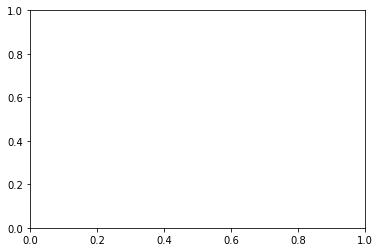

In [30]:
total_uses = activity_distribution_generation(size)
g = sns.kdeplot(total_uses, color='b', shade=True, Label='Iris_Virginica', cut=0, bw_adjust=0.2)
g.set_xticks(range(0, 25, 2))
g.set_xticklabels([str(x) for x in range(0, 25, 2)])
g

In [2]:
# total_minutes = from table
instances_and_costs = pd.merge(product_instances, products, left_on='product_id', right_on='id')
instances_and_costs['business_product_instance_id'] = instances_and_costs.index
instances_and_costs['vacant_sum'] = instances_and_costs['expenditure'] - instances_and_costs['cumulative_charge']
instances_and_costs[instances_and_costs['vacant_sum'] < 0] = 0
instances_and_costs.drop(['distribution_channel', 'status', 'name', 'recurrent', 'duration'], axis=1, inplace=True)

# CALLS
# Most unlimited accounts must be for businessmen. The average number of calls per day is 60, the average minutes number per day is 180. Source: https://www.salesbuzz.com/how-many-sales-calls-should-i-make-per-day/
# The mobile phone calls median is 8. Source: https://www.pewresearch.org/internet/2010/09/02/cell-phones-and-american-adults/
# Since no scientific papers regarding the distribution of phone calls number was fined, the average values are used and the duration is evenly spread
# This generation is for the included calls, so the rounding of minutes does not matter
calls_daily_median_regular = 5
calls_daily_mean_unlimited_plans = 60
calls_daily_mean_length_unlimited = 180 / 60
calls_regular_total = instances_and_costs[(instances_and_costs['allowance_voice'] < sys.maxsize) & (instances_and_costs['allowance_voice'] > 0)].count()[0] * calls_daily_median_regular
calls_unlimited_total = instances_and_costs[instances_and_costs['allowance_voice'] == sys.maxsize].count()[0] * calls_daily_mean_unlimited_plans
total_calls_daily = calls_regular_total + calls_unlimited_total


events_limited_calls = pd.DataFrame(np.repeat(instances_and_costs[(instances_and_costs['allowance_voice'] < sys.maxsize) & (instances_and_costs['allowance_voice'] > 0)].values, calls_daily_median_regular, axis=0), columns=instances_and_costs.columns)
events_limited_calls['duration'] = events_limited_calls['allowance_voice'] / 31 / calls_daily_median_regular
events_unlimited_calls = pd.DataFrame(np.repeat(instances_and_costs[instances_and_costs['allowance_voice'] == sys.maxsize].values, calls_daily_mean_unlimited_plans, axis=0), columns=instances_and_costs.columns)
events_unlimited_calls['duration'] = calls_daily_mean_length_unlimited
events = events_limited_calls.append(events_unlimited_calls)

# GENERATION OF CALL EVENTS - COPY AN EVENT PROMPT TABLE FOR EACH DAY
calls = []
# The generation period is March 20
for year in range(2018,2023):
  print(year)
  for month in range(1,13):
    print('месяц:',month)
    if month==2:
        k=29      
    else:
        if month==4 or month==6 or month==9 or month==11 :
            k=31
        else:
            k=32
    print('!!!!',k)
    for day in range(1, k):       
        #print(day, end=' ')
        calls_timestamps = pd.Series(activity_distribution_generation(total_calls_daily))
        np.random.shuffle(calls_timestamps)
        calls_timestamps = datetime(year, month, day) + pd.TimedeltaIndex(calls_timestamps, unit='h')
        current = events.copy()
        current['date'] = calls_timestamps
        calls.append(current)
# CREATE ONE DATAFRAME FROM THE CALLS ARRAY

calls_events = calls[0]
for i in range(1, len(calls)):
    calls_events = calls_events.append(calls[i])

calls_events['cost'] = 0
calls_events['number_of_sms'] = 0
calls_events['total_volume'] = 0
calls_events['event_type'] = 'call'

calls_events.head()


# DATA
# SMS

# instances_and_costs.head()

NameError: name 'product_instances' is not defined

In [74]:
# Source: https://www.statista.com/statistics/1050339/average-unlocks-per-day-us-smartphone-users/
unlocks_daily_mean_regular = 5
# unlocks_daily_mean_unlimited = 180 / 60
maxsize = products['allowance_data'].max()

internet_accesses_regular_total = instances_and_costs[(instances_and_costs['allowance_data'] < maxsize) & (instances_and_costs['allowance_data'] > 0)].count()[0] * unlocks_daily_mean_regular
internet_accesses_unlimited_total = instances_and_costs[instances_and_costs['allowance_data'] == maxsize].count()[0] * unlocks_daily_mean_regular
total_internet_access_number_daily = internet_accesses_regular_total + internet_accesses_unlimited_total


events_limited_data = pd.DataFrame(np.repeat(instances_and_costs[(instances_and_costs['allowance_data'] < maxsize) & (instances_and_costs['allowance_data'] > 0)].values, unlocks_daily_mean_regular, axis=0), columns=instances_and_costs.columns)
events_limited_data['total_volume'] = events_limited_data['allowance_data'] / 31 / unlocks_daily_mean_regular
events_unlimited_data = pd.DataFrame(np.repeat(instances_and_costs[instances_and_costs['allowance_data'] == maxsize].values, unlocks_daily_mean_regular, axis=0), columns=instances_and_costs.columns)
events_unlimited_data['total_volume'] = events_limited_data['allowance_data'] / 31 / unlocks_daily_mean_regular
events = events_limited_data.append(events_unlimited_data)

# GENERATION OF data EVENTS - COPY AN EVENT PROMPT TABLE FOR EACH DAY
data_accesses = []
# The generation period is March 20
for year in range(2018,2023):
  print(year)
  for month in range(1,13):
    if month==2:
        k=28
    else:    
        if month//2==0:
            k=31
        else:
            k=32
    for day in range(1, 32):
        print(day, end=' ')
        data_timestamps = pd.Series(activity_distribution_generation(total_internet_access_number_daily))
        np.random.shuffle(data_timestamps)
        data_timestamps = datetime(year, month, day) + pd.TimedeltaIndex(calls_timestamps, unit='h')
        current = events.copy()
        current['date'] = data_timestamps
        data_accesses.append(current)
# CREATE ONE DATAFRAME FROM THE data ARRAY
data_events = data_accesses[0]
for i in range(1, len(data_accesses)):
    data_events = data_events.append(data_accesses[i])

data_events['cost'] = 0
data_events['number_of_sms'] = 0
data_events['duration'] = 0
data_events['event_type'] = 'data'
print(data_events.shape[0] == total_internet_access_number_daily * 31)

2018
1 

C:\Users\ivan-\AppData\Local\Temp/ipykernel_12296/3792414909.py:33: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(data_timestamps)


ValueError: Length of values (68505) does not match length of index (46835)

In [ ]:
events_0 = calls_events.append(data_events)
events_0['calling_msisdn'] = events_0['customer_id']
cols_to_drop = ['vacant_sum', 'cumulative_charge', 'customer_id', 'product_id', 'expenditure', 'activation_date', 'termination_date', 'category', 'type', 'cost_for_call', 'cost_for_sms', 'cost_for_data', 'allowance_sms', 'allowance_voice', 'allowance_data']
print('here')
for col in cols_to_drop:
    print(col)
    events_0.pop(col)
# calls_events['event_id'] = np.arange(len(calls_events))
# calls_events['direction'] = 'outcoming'
# calls_events['roaming'] = np.random.choice([True, False], size=calls_events.count()[0], p=[0.1 ,0.9])
# calls_events['called_msisdn'] = -1

In [ ]:


df2 = product_instances[product_instances['product_id'].isin([range(3)])]
df2_1 = df2[df2['product_id'] == 0]
events2_3 = pd.DataFrame({
    'business_product_instance_id': df2_1['product_id'],
    'cost': df2_1['expenditure'] - 34.5,
    'duration': 0,
    'number_of_sms': (df2_1['expenditure'] - 34.5) // 0.25,
    'total_volume': 0,
    'event_type': 'sms',
})

df2_2 = df2[df2['product_id'] == 1]
events2_4 = pd.DataFrame({
    'business_product_instance_id': df2_2['product_id'],
    'cost': df2_2['expenditure'] - 126.5,
    'duration': 0,
    'number_of_sms': (df2_2['expenditure'] - 126.5) // 0.25,
    'total_volume': 0,
    'event_type': 'sms',
})

df2_3 = df2[df2['product_id'] == 2]
events2_5 = pd.DataFrame({
    'business_product_instance_id': df2_3['product_id'],
    'cost': df2_3['expenditure'] - 253.0,
    'duration': 0,
    'number_of_sms': (df2_3['expenditure'] - 253.0) // 0.25,
    'total_volume': 0,
    'event_type': 'sms',
})

df3 = product_instances[product_instances['product_id'].isin([24, 25])]
df3_1 = df3[df3['product_id'] == 24]
events3_3 = pd.DataFrame({
    'business_product_instance_id': df3_1['product_id'],
    'cost': df3_1['expenditure'] - 80.5,
    'duration': 0,
    'number_of_sms': (df3_1['expenditure'] - 80.5) // 0.285,
    'total_volume': 0,
    'event_type': 'sms',
})

df3_2 = df3[df3['product_id'] == 25]
events3_4 = pd.DataFrame({
    'business_product_instance_id': df3_2['product_id'],
    'cost': df3_2['expenditure'] - 517.5,
    'duration': 0,
    'number_of_sms': (df3_2['expenditure'] - 517.5) // 0.285,
    'total_volume': 0,
    'event_type': 'sms',
})


events = pd.concat([events2_3, events2_4, events2_5, events3_3, events3_4], axis=0)
dates = []
for _ in range(events.count()[0]):
    dates.append(random_date("2018-01-01", str(date.today()), random.random()))
events['date'] = pd.Series(dates)
events['calling_msisdn'] = -1

events = pd.concat([events, events_0], axis=0)
events['event_id'] = np.arange(len(events))
events['direction'] = 'outcoming'
events['roaming'] = np.random.choice([True, False], size=events.count()[0], p=[0.1 ,0.9])
events['called_msisdn'] = -1
print(events.count())
events.head()

In [ ]:
'''number_of_chunks = 5
for id, df_i in enumerate(np.array_split(events, number_of_chunks)):
    df_i.to_csv(f'tests_costed_events_{id}.csv')'''



events.to_csv('costed_events_last.csv')

In [ ]:
# df1 = product_instances[product_instances['product_id'].isin([range(3,9)])]
# events1 = pd.DataFrame({
#     'business_product_instance_id': df1['product_id'],
#     'cost': 0,
#     'duration': 0,
#     'number_of_sms': 0,
#     'total_volume': np.random.randint(1, 10, df1.count()[0]) * 10e6,
#     'event_type': 'data',
# })
#
# df2 = product_instances[product_instances['product_id'].isin([range(3)])]
# events2_1 = pd.DataFrame({
#     'business_product_instance_id': df2['product_id'],
#     'cost': 0,
#     'duration': np.random.randint(1, 100, df2.count()[0]),
#     'number_of_sms': 0,
#     'total_volume': 0,
#     'event_type': 'call',
# })
#
# events2_2 = pd.DataFrame({
#     'business_product_instance_id': df2['product_id'],
#     'cost': 0,
#     'duration': 0,
#     'number_of_sms': 0,
#     'total_volume': np.random.randint(1, 10, df2.count()[0]) * 10e4,
#     'event_type': 'data',
# })
#
# df2_1 = df2[df2['product_id'] == 0]
# events2_3 = pd.DataFrame({
#     'business_product_instance_id': df2_1['product_id'],
#     'cost': df2_1['expenditure'] - 34.5,
#     'duration': 0,
#     'number_of_sms': (df2_1['expenditure'] - 34.5) // 0.25,
#     'total_volume': 0,
#     'event_type': 'sms',
# })
#
# df2_2 = df2[df2['product_id'] == 1]
# events2_4 = pd.DataFrame({
#     'business_product_instance_id': df2_2['product_id'],
#     'cost': df2_2['expenditure'] - 126.5,
#     'duration': 0,
#     'number_of_sms': (df2_2['expenditure'] - 126.5) // 0.25,
#     'total_volume': 0,
#     'event_type': 'sms',
# })
#
# df2_3 = df2[df2['product_id'] == 2]
# events2_5 = pd.DataFrame({
#     'business_product_instance_id': df2_3['product_id'],
#     'cost': df2_3['expenditure'] - 253.0,
#     'duration': 0,
#     'number_of_sms': (df2_3['expenditure'] - 253.0) // 0.25,
#     'total_volume': 0,
#     'event_type': 'sms',
# })
#
# df3 = product_instances[product_instances['product_id'].isin([24, 25])]
# events3_1 = pd.DataFrame({
#     'business_product_instance_id': df3['product_id'],
#     'cost': 0,
#     'duration': np.random.randint(1, 100, df3.count()[0]),
#     'number_of_sms': 0,
#     'total_volume': 0,
#     'event_type': 'call',
# })
#
# events3_2 = pd.DataFrame({
#     'business_product_instance_id': df3['product_id'],
#     'cost': 0,
#     'duration': 0,
#     'number_of_sms': 0,
#     'total_volume': np.random.randint(1, 10, df3.count()[0]) * 10e4,
#     'event_type': 'data',
# })
#
# df3_1 = df3[df3['product_id'] == 24]
# events3_3 = pd.DataFrame({
#     'business_product_instance_id': df3_1['product_id'],
#     'cost': df3_1['expenditure'] - 80.5,
#     'duration': 0,
#     'number_of_sms': (df3_1['expenditure'] - 80.5) // 0.285,
#     'total_volume': 0,
#     'event_type': 'sms',
# })
#
# df3_2 = df3[df3['product_id'] == 25]
# events3_4 = pd.DataFrame({
#     'business_product_instance_id': df3_2['product_id'],
#     'cost': df3_2['expenditure'] - 517.5,
#     'duration': 0,
#     'number_of_sms': (df3_2['expenditure'] - 517.5) // 0.285,
#     'total_volume': 0,
#     'event_type': 'sms',
# })
#
#
# events = pd.concat([value for key, value in globals().items() if key.startswith('event')], axis=0)
#
# events['event_id'] = np.arange(len(events))
# dates = []
# for _ in range(events.count()[0]):
#     dates.append(random_date("2022-03-01", "2022-03-31", random.random()))
# events['date'] = pd.Series(dates)
#
# events['direction'] = 'outcoming'
# events['roaming'] = np.random.choice([True, False], size=events.count()[0], p=[0.1 ,0.9])
# events['calling_msisdn'] = -1
# events['called_msisdn'] = -1
# events.head()

In [ ]:
product_instances.pop('expenditure')
product_instances.to_csv('business_product_instances_last.csv')